# Assignment-1 ( 15 Marks)

## GNN Group 49

## Group Member Names:
1. Mukund Kumar (2023AA05458)
2. Basant Singh Bhaskar (2023aa05512)
3. Michael Joshua Glenn Marilyn (2023aa05394)
4. Nagamalla Nitin Kumar (2023ab05106)
5. Omkar Raju Iyer (2023aa05318)



## Part-1  ( 2 marks)

Use the given dataset to design GNN based model for Node Classification as per details given below:

Graph: The ogbn-products dataset is an undirected and unweighted graph, representing an Amazon product co-purchasing network [1]. Nodes represent products sold in Amazon, and edges between two products indicate that the products are purchased together. We follow [2] to process node features and target categories. Specifically, node features are generated by extracting bag-of-words features from the product descriptions followed by a Principal Component Analysis to reduce the dimension to 100.

URL: https://ogb.stanford.edu/docs/nodeprop/#ogbn-productsLinks to an external site.

You are expected to create Model using Pytorch Geometric MP-GNN based library.

Do not copy existing model given in OGB site but create your own model.


## Part-2 ( 1 Marks)

Use https://ogb.stanford.edu/docs/home/Links to an external site. to learn dataset loading and checking performance method.


## Part-3 ( 2X6 Marks)

Based  on loaded dataset also compute following point:

Diameter , number of nodes and edges , Global Clustering Coefficient of existing graph
Plot the graph with label
 Refer Relevant material from Book related to Subgraph generation and provide explanation how you are generating subgraph
Generate Node Induced Subgraph.
Generate Node embedding using 2-hop method for all nodes in subgraph using MP-GNN library in PyTorch Geometric
Plot Subgrpah and compute their Diameter.
 

# Instruction for Student:

Student is expected to use BITS Provided Labs and write Python code for model development.
Pytorch Library and Pytorch Geometric Library can be used
Python Library can be use
NetworkX Library needs to use.
This group assignment, so each member of group is expected to contribute evenly in completing the assignment.
Assignment should be submitted in PDF format which contains Codes and their outcomes along with explanation.
Link of Python code in BITS library needs to be given as we will be running the code in Lab environment.
Each group has to work independently should not copy code or outcome of other group. If Plagiarism found the that will be dealt as per BITS Policy.


----------------------------------------------------------------------------------------

## Part-1  ( 2 marks)

Use the given dataset to design GNN based model for Node Classification as per details given below:

Graph: The ogbn-products dataset is an undirected and unweighted graph, representing an Amazon product co-purchasing network **[1]**. 

**Nodes represent products sold** in Amazon, and **edges between two products** indicate that the **products are purchased together**. 

We follow **[2]** to process node features and target categories. Specifically, node features are generated by extracting bag-of-words features from the product descriptions followed by a Principal Component Analysis to reduce the dimension to 100.
 

URL: https://ogb.stanford.edu/docs/nodeprop/#ogbn-productsLinks to an external site.

You are expected to create Model using Pytorch Geometric MP-GNN based library.

Do not copy existing model given in OGB site but create your own model.

### References
[1] http://manikvarma.org/downloads/XC/XMLRepository.html

[2] Wei-Lin Chiang, Xuanqing Liu, Si Si, Yang Li, Samy Bengio, and Cho-Jui Hsieh. Cluster-GCN: An efficient algorithm for training deep and large graph convolutional networks. In ACM SIGKDD Conference on Knowledge Discovery and Data Mining (KDD), pp. 257–266, 2019.




In [1]:
import torch
import torch_geometric as tgeo
from torch_geometric.data import DataLoader
from ogb.nodeproppred import PygNodePropPredDataset
import networkx as nx
import matplotlib.pyplot as plt
import random

# SEED
SEED = 42
random.seed(SEED)
tgeo.seed_everything(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

# Constants
DEVICE = torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU"
print(f"Device : {DEVICE}")

#!python -c "import ogb; print(ogb.__version__)"

Device : NVIDIA GeForce RTX 2060


## Dataset format:

The data files for all the datasets are in the following sparse representation format:

Header Line: **Total_Points Num_Features Num_Labels**

1 line per datapoint : **label1,label2,...labelk ft1:ft1_val ft2:ft2_val ft3:ft3_val .. ftd:ftd_val**

For the small scale datasets, we have provided the complete data in one file. We have provided separate files for the train and test splits which contain the indices of the points that are in the train set and the test set. Each corresponding column of the split files contains a separate split.

For the large scale datasets, we have provided a single train and test split individually in two separate files.

In [2]:
dataset_name = "ogbn-arxiv"

dataset = PygNodePropPredDataset(name=dataset_name)
pyg_Graph = dataset[0]

split_idx = dataset.get_idx_split()
# train_idx, valid_idx, test_idx = split_idx["train"], split_idx["valid"], split_idx["test"]

# train_loader = DataLoader(dataset[split_idx["train"]], batch_size=32, shuffle=True) # type: ignore
# validation_loader = DataLoader(dataset[split_idx["valid"]], batch_size=32, shuffle=True) # type: ignore
# test_loader = DataLoader(dataset[split_idx["test"]], batch_size=32, shuffle=True) # type: ignore





/home/n00b/anaconda3/envs/gnn/lib/python3.11/site-packages/ogb/nodeproppred/dataset_pyg.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.slices = torch.l

## Part-2 ( 1 Marks)

Use https://ogb.stanford.edu/docs/home/Links to an external site. to learn dataset loading and checking performance method.

## Part-3 ( 2X6 Marks)

Based  on loaded dataset also compute following point:

1. Diameter , 
2. number of nodes and edges , 
3. Global Clustering Coefficient of existing graph

4. Plot the graph with label
    Refer Relevant material from Book related to Subgraph generation and provide explanation how you are generating subgraph

5. Generate Node-Induced Subgraph.
6. Generate Node embedding using 2-hop method for all nodes in subgraph using MP-GNN library in PyTorch Geometric
7. Plot Subgrpah and compute their Diameter.

In [3]:

nx_graph = tgeo.utils.to_networkx(pyg_Graph, to_undirected=False) # type: ignore

# (a) Diameter
# diameter = nx.diameter(nx_graph)
# print(f"Diamter of the graph : {diameter}")

# (b) Number of nodes and edges
num_nodes = nx_graph.number_of_nodes()
num_edges = nx_graph.number_of_edges()

print(f"Number of nodes : {num_nodes}") # type: ignore
print(f"Number of edges : {num_edges}") # type: ignore


# (c) Global Clustering Coefficient of existing graph
global_clustering_coefficient = nx.transitivity(nx_graph)
print(f"Global Clustering Coefficient : {global_clustering_coefficient}")

Number of nodes : 169343
Number of edges : 1166243
Global Clustering Coefficient : 0.11536348329834656


KeyboardInterrupt: 

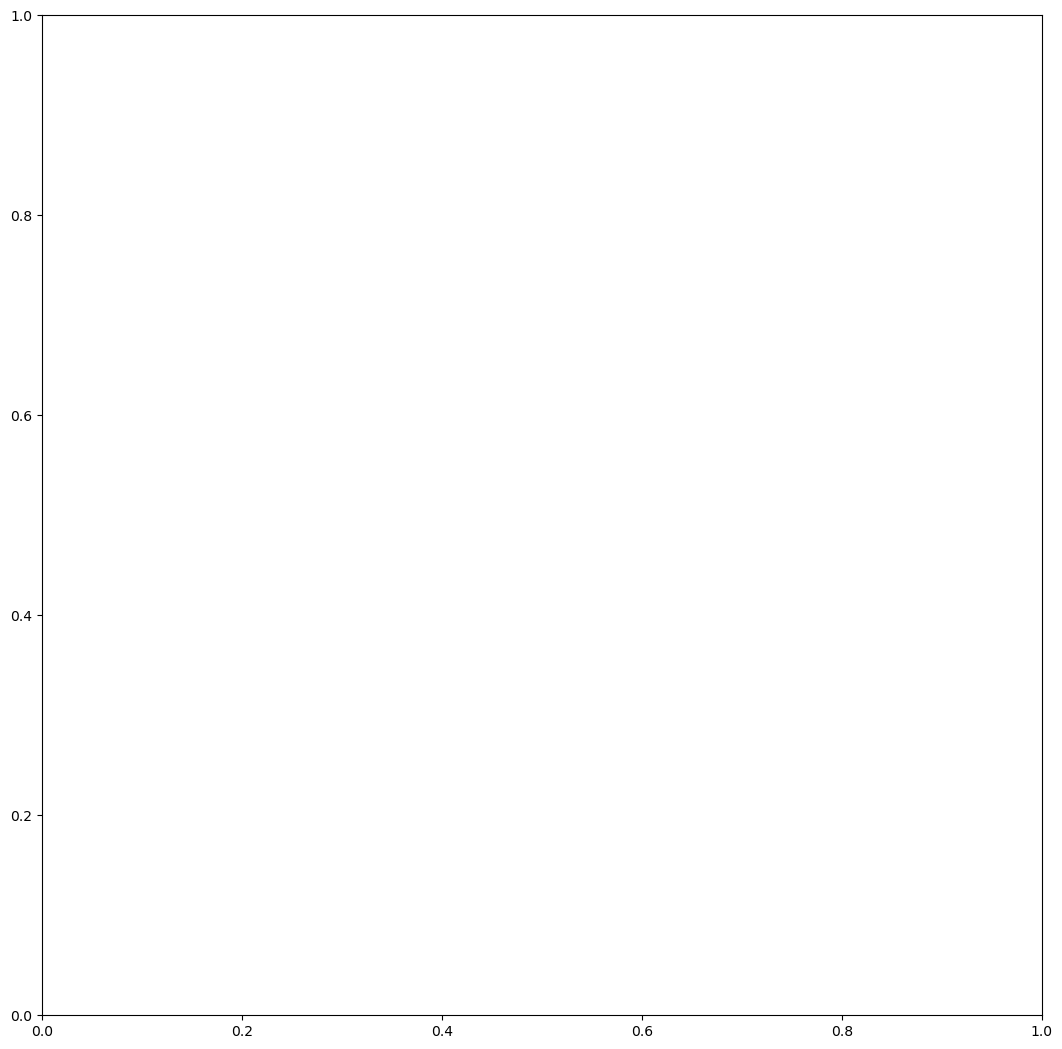

In [4]:
# (d) Plot the Graph with Labels

plt.figure(figsize=(10, 10))
nx.draw(nx_graph, with_labels=True, node_size=10, font_size=8)
plt.title("Graph with Labels")
plt.show()


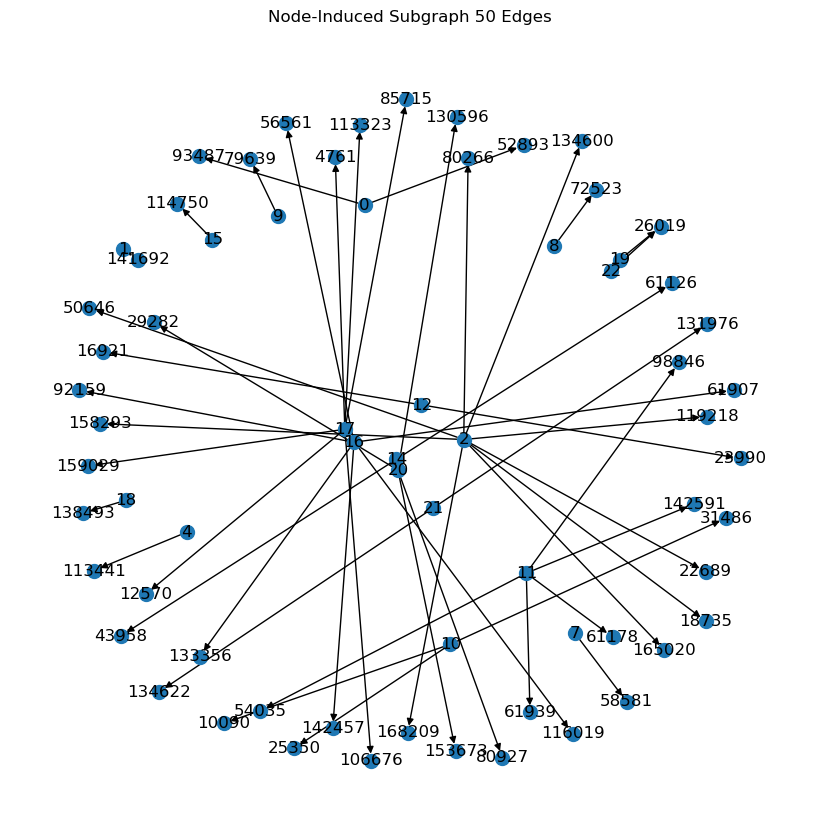

Diameter of subgraph : 62


In [6]:
# (e) Generate Node-Induced Subgraph

# Selecting 500 random nodes
nodes = 50
random_nodes = list(nx_graph.edges)[:nodes]
nx_subgraph = nx_graph.edge_subgraph(random_nodes)

# Plot the subgraph
plt.figure(figsize=(8, 8))
nx.draw(nx_subgraph, with_labels=True, node_size=100)
plt.title(f"Node-Induced Subgraph {nodes} Edges")
plt.show()

# Diameter of subgraph
max_diameter = 0
for component in nx.strongly_connected_components(nx_graph):
    nx_subgraph = nx_graph.subgraph(component).copy()
    max_diameter = max(max_diameter, nx.algorithms.approximation.diameter(nx_subgraph))

print(f"Diameter of subgraph : {max_diameter}")

In [7]:
# (f) Generate Node Embeddings using 2-Hop method

class TwoHopGNN(torch.nn.Module):
    """2-hop method for GNN"""
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        torch.manual_seed(SEED)
        self.conv1 = tgeo.nn.GCNConv(in_channels, hidden_channels)
        self.conv2 = tgeo.nn.GCNConv(hidden_channels, hidden_channels)
        self.classifer = torch.nn.Linear(hidden_channels, out_features=out_channels)


    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = torch.nn.functional.tanh(h)
        h = self.conv2(h, edge_index)
        h = torch.nn.functional.tanh(h)

         # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h
    

# Model
model = TwoHopGNN(dataset.num_features, 10, dataset.num_classes)
print(model)

TwoHopGNN(
  (conv1): GCNConv(128, 10)
  (conv2): GCNConv(10, 10)
  (classifer): Linear(in_features=10, out_features=40, bias=True)
)
